# Wikipedia: performance vs. out-degree

Breaks down the performance of ChoiceRank vs. baselines on the Wikipedia dataset based on out-degree of nodes.

In [1]:
%matplotlib inline

In [2]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pickle
import thesis

In [3]:
thesis.setup_plotting()

Thesis settings loaded!


## Load the data

In [4]:
with open("data/wpclk-201603.pickle", "rb") as f:
    data = pickle.load(f)
kls = data["kls-by-deg"]  # Maps out-degree -> total KL-divergence
ws = data["ws-by-deg"]  # Maps out-degree -> total weight

## Plot it

/Users/maystre/.virtualenvs/thesis/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


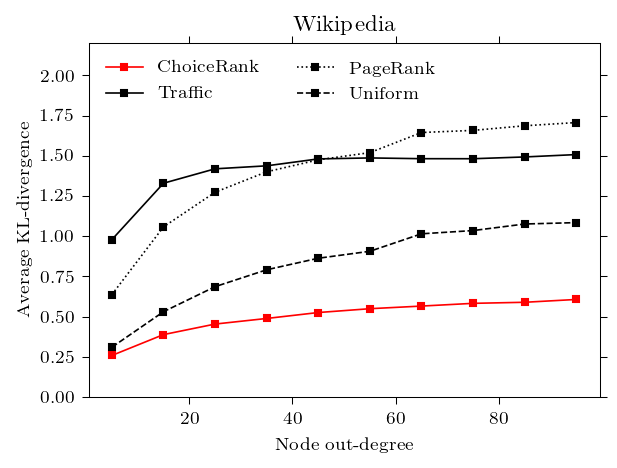

In [5]:
fig, ax = plt.subplots(figsize=(4.25, 3.25))
degs = np.arange(5, 100, step=10)

methods = ("crnk", "traf", "prnk", "unif")
labels = ("ChoiceRank", "Traffic", "PageRank", "Uniform")
colors = ("red", "black", "black", "black")
linestyles = ("-", "-", ":", "--")

for m, label, color, ls in zip(methods, labels, colors, linestyles):
    tot_kl = collections.defaultdict(lambda: 0)
    tot_weight = collections.defaultdict(lambda: 0)
    for deg, kl in kls[m].items():
        quant = 10*int(deg / 10) + 5  # Quantize the degree
        if quant in degs:
            tot_kl[quant] += kl
            tot_weight[quant] += ws[deg]
    ys = list()
    for deg in degs:
        ys.append(tot_kl[deg] / tot_weight[deg])
    ax.plot(degs, ys, marker="s", ms=3, ls=ls, color=color, linewidth=0.8, label=label)
    
ax.legend(loc="upper left", ncol=2)
ax.set_ylim(ymin=0, ymax=2.2)
ax.set_xlabel("Node out-degree")
ax.set_ylabel("Average KL-divergence")
ax.set_title("Wikipedia")

fig.savefig("perf-wikipedia.pdf")